# Lab 06: Logistic Regression and Evaluation Metrics

112501533 黃思誠


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


## Load the data & Split feature, label


In [2]:
data = pd.read_csv(
    "http://archive.ics.uci.edu/ml/machine-learning-databases/"
    "arrhythmia/arrhythmia.data",
    header=None,
    sep=",",
    engine="python",
)

# * Transform the data
# Reduce the number of classes to 2
data["arrhythmia"] = data.iloc[:, -1].apply(lambda x: 0 if x == 1 else 1)

# Only keep numeric data
data = data._get_numeric_data()

# Split the data into X and y
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

data.head(3)


,0,1,2,3,4,5,6,7,8,9,...,271,272,273,274,275,276,277,278,279,arrhythmia
0,75,0,190,80,91,193,371,174,121,-16,...,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8,1
1,56,1,165,64,81,174,401,149,39,25,...,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6,1
2,54,0,172,95,138,163,386,185,102,96,...,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10,1


## Split and standarize the training & testing set


In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=20181004
)

# Standardize the data
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)


## Building of a Logistic Regression model


In [4]:
class LogisticRegression(object):
    def __init__(self, eta=0.05, n_epoch=100, random_state=1):
        """
        Feel free to change the hyperparameters
        """

        self.eta = eta
        self.n_epoch = n_epoch
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_epoch):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            gradient_weights, gradient_bias = self.gradient(X, output, y)
            self.w_[1:] += self.eta * gradient_weights
            self.w_[0] += self.eta * gradient_bias
            cost = self.loss(output, y)
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def loss(self, output, y):
        """Calculate cross entropy loss"""
        first = y * np.log(output)
        seacond = (1 - y) * np.log(1 - output + 1e-308)
        loss = -1 * (first + seacond).mean()

        return loss

    def gradient(self, X, output, y):
        """
        Calculate the partial derivative of cross entropy loss with respect to weights
        """
        errors = y - output
        return errors.dot(X), errors.sum()

    def activation(self, z):
        """Compute logistic sigmoid activation"""
        return 1 / (1 + np.exp(-z))

    def predict(self, X):
        """Return class label after unit step"""
        net_input = self.net_input(X)

        return np.where(self.activation(net_input) >= 0.5, 1, 0)


## Train & Predict


In [5]:
model = LogisticRegression()
model.fit(X_train_std, y_train)

y_pred = model.predict(X_test_std)


## Plot the loss curve


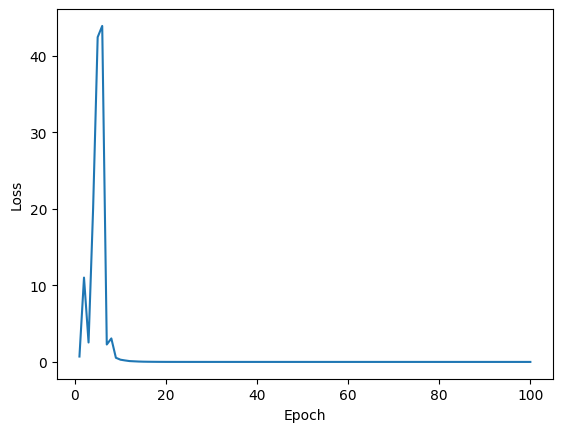

In [6]:
plt.plot(range(1, model.n_epoch + 1), model.cost_)
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()


## Plot the confusion matrix


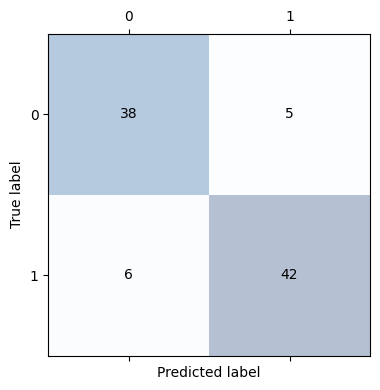

In [7]:
true_positive = np.count_nonzero(y_pred[y_pred == y_test] == 0)
true_negative = np.count_nonzero(y_pred[y_pred == y_test] == 1)
false_positive = np.count_nonzero(y_pred[y_pred != y_test] == 1)
false_negative = np.count_nonzero(y_pred[y_pred != y_test] == 0)

confmat = np.array([[true_positive, false_positive], [false_negative, true_negative]])

fig, ax = plt.subplots(figsize=(4, 4))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va="center", ha="center")

plt.xlabel("Predicted label")
plt.ylabel("True label")

plt.tight_layout()
plt.show()


## Calculate the F1 scroe


In [8]:
precision = true_positive / (true_positive + false_positive)
recall = true_positive / (true_positive + false_negative)

f1_score = 2 * (precision * recall) / (precision + recall)

print("F1 score: ", f1_score)


F1 score:  0.8735632183908046
